## `Regression models - car price prediction.`

### Lets Load required libraries.

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score,KFold
pd.options.display.max_columns=None
pd.options.display.max_rows=None

### Lets load the dataset.

In [219]:
df = pd.read_csv('car_sales.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Lets check the shape.

In [220]:
df.shape

(93, 27)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

<AxesSubplot:>

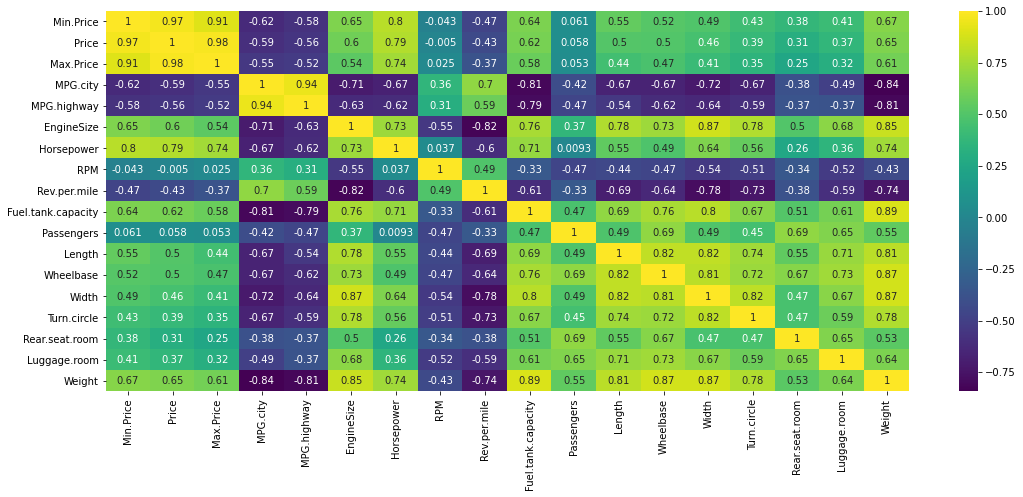

In [222]:
plt.figure(figsize=[18,7])
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### Multivariate Analysis.

<AxesSubplot:xlabel='Passengers', ylabel='Price'>

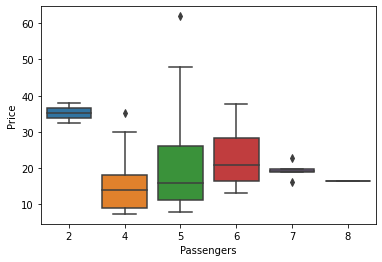

In [223]:
sns.boxplot(y=df['Price'],x=df['Passengers'])

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

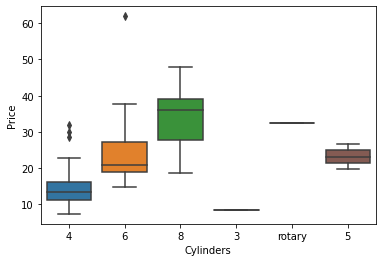

In [224]:
sns.boxplot(df['Cylinders'],df['Price'])

<AxesSubplot:xlabel='Origin', ylabel='Price'>

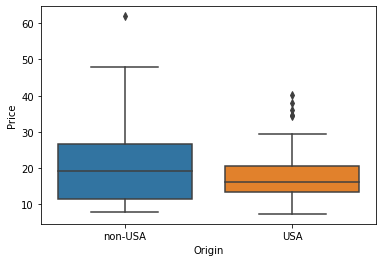

In [225]:
sns.boxplot(df['Origin'],df['Price'])

<AxesSubplot:xlabel='AirBags', ylabel='Price'>

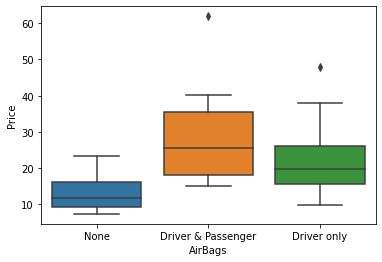

In [226]:
sns.boxplot(df['AirBags'],df['Price'])

<AxesSubplot:xlabel='Man.trans.avail', ylabel='Price'>

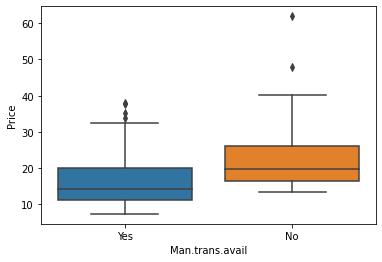

In [227]:
sns.boxplot(df['Man.trans.avail'],df['Price'])

<AxesSubplot:xlabel='DriveTrain', ylabel='Price'>

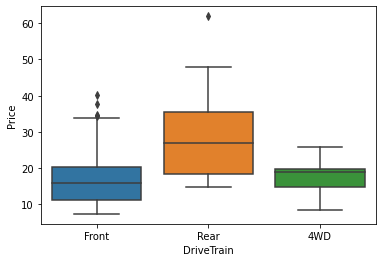

In [228]:
sns.boxplot(df['DriveTrain'],df['Price'])

### `Null value Imputation key points.`
- *Bigdata (10K to 100K) - method(dropna).*
- *Dataset size(500-2000)upto 5-10% of size of n - method(Median Imputation or random sampling.)*
- *Dataset around 1000, 10-20% of records is missing = method(KNN IMPUTER).*

In [229]:
(df.isnull().sum()/len(df))*100

Manufacturer           0.000000
Model                  0.000000
Type                   0.000000
Min.Price              0.000000
Price                  0.000000
Max.Price              0.000000
MPG.city               0.000000
MPG.highway            0.000000
AirBags                0.000000
DriveTrain             0.000000
Cylinders              0.000000
EngineSize             0.000000
Horsepower             0.000000
RPM                    0.000000
Rev.per.mile           0.000000
Man.trans.avail        0.000000
Fuel.tank.capacity     0.000000
Passengers             0.000000
Length                 0.000000
Wheelbase              0.000000
Width                  0.000000
Turn.circle            0.000000
Rear.seat.room         2.150538
Luggage.room          11.827957
Weight                 0.000000
Origin                 0.000000
Make                   0.000000
dtype: float64

In [230]:
## Lets treat the null values using KNN Imputer.
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=3)

df.iloc[:,22:24] = imp.fit_transform(df.iloc[:,22:24])

In [231]:
df.isnull().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

### `Note:` Dropping the unwanted columns based on the business understanding.

In [232]:
df['Passengers'].unique()

array([5, 6, 4, 7, 8, 2], dtype=int64)

In [233]:
df['Passengers'] = df['Passengers'].astype(object)

In [234]:
X = df.drop(['Manufacturer','Model','Min.Price','Max.Price','Make'],axis=1)
X.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [235]:
### Creating dummy columns to categorical variables.
X = pd.get_dummies(data=X,drop_first=True)
X.head()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
0,15.9,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11.0,2705,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,33.9,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15.0,3560,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
2,29.1,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14.0,3375,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.7,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17.0,3405,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,30.0,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13.0,3640,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1


### Lets build an Linear Regression model.

In [236]:
df = X

In [237]:
X = df.drop('Price',axis=1)
y = df['Price']

In [238]:
Xc = sm.add_constant(X)
Xc.head(2)

,const,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
0,1.0,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11.0,2705,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,1.0,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15.0,3560,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1


In [239]:
full_model = sm.OLS(y,Xc).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     10.09
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.56e-14
Time:                        12:38:01   Log-Likelihood:                -252.44
No. Observations:                  93   AIC:                             574.9
Df Residuals:                      58   BIC:                             663.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 111.7199     35.818      3.119      0.003      40.022     183.418
MPG.city               -0.3305      0.428     -0.772      0.443      -1.188       0.527
MPG.highway             0.1776      0.392      0.453      0.652      -0.607       0.963
EngineSize             -1.6186      2.827     -0.573      0.569      -7.277       4.040
Horsepower              0.1360      0.045      3.052      0.003       0.047       0.225
RPM                    -0.0025      0.002     -1.084      0.283      -0.007       0.002
Rev.per.mile            0.0017      0.002      0.770      0.444      -0.003       0.006
Fuel.tank.capacity      0.4555      0.539      0.845      0.401      -0.623       1.534
Length                  0.0461      0.109      0.422      0.675      -0.173       0.265
Wheelbase               0.3825      0.273      1.400      0.167      -0.164       0.929
Width                  -1.9048      0.541     -3.522      0.001      -2.988      -0.822
Turn.circle            -0.6176      0.365     -1.692      0.096      -1.348       0.113
Rear.seat.room          0.2879      0.370      0.778      0.440      -0.453       1.029
Luggage.room            0.2935      0.322      0.913      0.365      -0.350       0.937
Weight                 -0.0013      0.006     -0.235      0.815      -0.013       0.010
Type_Large              1.4411      4.203      0.343      0.733      -6.972       9.854
Type_Midsize            3.8719      2.441      1.586      0.118      -1.015       8.759
Type_Small              1.0329      2.666      0.387      0.700      -4.305       6.370
Type_Sporty             6.2888      3.341      1.882      0.065      -0.399      12.977
Type_Van                2.9088      6.985      0.416      0.679     -11.074      16.892
AirBags_Driver only    -3.7791      1.896     -1.993      0.051      -7.574       0.016
AirBags_None           -8.3366      2.179     -3.826      0.000     -12.698      -3.975
DriveTrain_Front        2.1068      2.299      0.916      0.363      -2.495       6.709
DriveTrain_Rear         7.1087      2.903      2.449      0.017       1.298      12.920
Cylinders_4            -1.9798      4.435     -0.446      0.657     -10.857       6.898
Cylinders_5            -3.5177      6.706     -0.525      0.602     -16.941       9.906
Cylinders_6             1.2106      5.571      0.217      0.829      -9.940      12.362
Cylinders_8             3.9456      6.743      0.585      0.561      -9.553      17.444
Cylinders_rotary      -14.7404     12.704     -1.160      0.251     -40.170      10.689
Man.trans.avail_Yes    -2.0878      2.144     -0.974      0.334      -6.380       2.204
Passengers_4           -5.6927      7.075     -0.805      0.424     -19.855       8.470
Passengers_5           -2.5601      7.485     -0.342      0.734     -17.544      12.423
Pas

##### As we can see there's a huge difference b/w the r-squared and adjusted r-squared score. (r-squared score is misleading us.)

### Lets do feature Selection by `Recursive Backward Elimination.`

In [240]:
cols = list(Xc.columns)
while (len(cols)>0):
    X1 = Xc[cols]
    model = sm.OLS(y,X1).fit()
    p = model.pvalues
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_pmax)
    else:
        break
selected_features = cols
print('selected features: ',selected_features)


selected features:  ['const', 'Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear']


In [241]:
X_new = Xc[selected_features]
X_new.head()

,const,Horsepower,Fuel.tank.capacity,Wheelbase,Width,Type_Midsize,AirBags_Driver only,AirBags_None,DriveTrain_Rear
0,1.0,140,13.2,102,68,0,0,1,0
1,1.0,200,18.0,115,71,1,0,0,0
2,1.0,172,16.9,102,67,0,1,0,0
3,1.0,172,21.1,106,70,1,0,0,0
4,1.0,208,21.1,109,69,1,1,0,1


### Now lets build a model only with selected features.

In [242]:
improvised_model = sm.OLS(y,X_new).fit()
improvised_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     40.08
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.51e-25
Time:                        12:38:01   Log-Likelihood:                -269.27
No. Observations:                  93   AIC:                             556.5
Df Residuals:                      84   BIC:                             579.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  45.2793     13.385      3.383      0.001      18.662      71.897
Horsepower              0.1137      0.015      7.468      0.000       0.083       0.144
Fuel.tank.capacity      0.6133      0.305      2.011      0.047       0.007       1.220
Wheelbase               0.4644      0.135      3.430      0.001       0.195       0.734
Width                  -1.4171      0.268     -5.283      0.000      -1.951      -0.884
Type_Midsize            2.8692      1.244      2.307      0.024       0.396       5.342
AirBags_Driver only    -3.3025      1.435     -2.301      0.024      -6.157      -0.448
AirBags_None           -6.1950      1.680     -3.687      0.000      -9.536      -2.854
DriveTrain_Rear         4.6664      1.420      3.286      0.001       1.842       7.491
==============================================================================
Omnibus:                       25.799   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.756
Skew:                           0.968   Prob(JB):                     6.41e-14
Kurtosis:                       6.454   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### As we can see now there's not much difference b/w r-squared and adjusted r-squared score, and AIC and BIC values also been reduced, this shows that we have been removed non contributing features and built model using contributing features.

### Lets Implement the model using sklearn package and find bias error and variance error using `Kfold cross validation.`

In [243]:
LR = LinearRegression()

In [244]:
## we can also give cv directly in cross_val_score but random_state cant be setted.
## For setting random state we are setting CV explicitly.
kf = KFold(n_splits=3,shuffle=True,random_state=0)

In [245]:
mse = cross_val_score(LR,X_new,y,cv=kf,scoring='neg_mean_squared_error')

rmse = np.sqrt(np.abs(mse))
rmse_avg = np.mean(rmse)
rmse_SD = np.std(rmse,ddof=1)

print('Bias error: ',rmse_avg)
print('Variance error: ',rmse_SD)

Bias error:  5.065193476244542
Variance error:  0.9942979486444475


### Lets build different non-linear Regression models and compare the results.

In [246]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

### `Gradient Boost Regressor.`

In [247]:
GB_bias = []
GB_Var = []

for i in np.arange(1,100):
   GB = GradientBoostingRegressor(n_estimators=i, random_state=0)

   scores = cross_val_score(GB,X_new,y,cv=3,scoring='neg_mean_squared_error')
   rmse = np.sqrt(np.abs(scores))
   GB_bias.append(np.mean(rmse))
   GB_Var.append(np.std(rmse,ddof=1))

In [248]:
np.argmin(GB_bias),np.min(GB_bias),GB_Var[16]

(16, 6.900398190543755, 2.453743946030265)

### `AdaBoost Regressor.`

In [249]:
AB_bias = []
AB_Var = []

for i in range(1,150,1):
   AB = AdaBoostRegressor(n_estimators=i, random_state=0)

   scores = cross_val_score(AB,X_new,y,cv=3,scoring='neg_mean_squared_error')
   rmse = np.sqrt(np.abs(scores))
   AB_bias.append(np.mean(rmse))
   AB_Var.append(np.std(rmse,ddof=1))

In [250]:
np.argmin(AB_bias),np.min(AB_bias),AB_Var[13]

(13, 6.0206233893633945, 2.019285656703856)

### `Bagging Regressor.`

In [251]:
Bagg_bias = []
Bagg_var = []
LR = LinearRegression()
for i in np.arange(1,100):
   Bagg = BaggingRegressor(base_estimator=LR,n_estimators=i, random_state=0)

   scores = cross_val_score(Bagg,X_new,y,cv=3,scoring='neg_mean_squared_error')
   rmse = np.sqrt(np.abs(scores))
   Bagg_bias.append(np.mean(rmse))
   Bagg_var.append(np.std(rmse,ddof=1))

In [252]:
np.argmin(Bagg_bias),np.min(Bagg_bias),Bagg_var[59]

(59, 5.060406137505132, 1.235689835365319)

### `RandomForest Regressor.`

In [253]:
RF_bias=[]
RF_var=[]
for i in np.arange(1,100):
   RF = RandomForestRegressor(criterion='mse',n_estimators=i, random_state=0)

   scores = cross_val_score(RF,X_new,y,cv=3,scoring='neg_mean_squared_error')
   rmse = np.sqrt(np.abs(scores))
   RF_bias.append(np.mean(rmse))
   RF_var.append(np.std(rmse,ddof=1))

In [254]:
np.argmin(RF_bias),np.min(RF_bias),RF_var[38]

(38, 6.44704380033613, 1.9900818062847319)

### `Decision Tree Regressor.`

In [255]:
DT_bias=[]
DT_var=[]
for i in np.arange(1,100):
   DT = DecisionTreeRegressor(max_depth=i, random_state=0)

   scores = cross_val_score(DT,X_new,y,cv=3,scoring='neg_mean_squared_error')
   rmse = np.sqrt(np.abs(scores))
   DT_bias.append(np.mean(rmse))
   DT_var.append(np.std(rmse,ddof=1))

In [256]:
np.argmin(DT_bias),np.min(DT_bias),DT_var[1]

(1, 7.602315848674704, 2.7694269365300155)

### `Stacking`

In [257]:
LR = LinearRegression()
LR_bag = BaggingRegressor(base_estimator=LR,n_estimators=60,random_state=0)
LR_AB = AdaBoostRegressor(base_estimator=LR,n_estimators=14,random_state=0)
DT_AB = AdaBoostRegressor(n_estimators=26,random_state=0)
LR_GB = GradientBoostingRegressor(n_estimators=17,random_state=0)
RF = RandomForestRegressor(criterion='mse',n_estimators=39,random_state=0)

stacked = VotingRegressor(estimators=[('Bagged_LR',LR_bag),('LR',LR),
                                     ('LR_Boost',LR_AB)])

In [258]:
models = []
models.append(('LinearRegression', LR))
models.append(('BaggedLR',LR_bag))
models.append(('Adaboost',LR_AB))
models.append(('DT_boost',DT_AB))
models.append(('GBoost',LR_GB))
models.append(('RF',RF))
models.append(('Stacked',stacked))


In [259]:
from sklearn import model_selection

In [260]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_new, y ,cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))

LinearRegression: 5.065193 (0.994298)
BaggedLR: 5.052444 (1.031353)
Adaboost: 5.565516 (0.389558)
DT_boost: 6.009268 (1.268241)
GBoost: 6.057505 (1.900875)
RF: 5.906276 (2.113345)
Stacked: 5.181032 (0.823781)


In [261]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
DT_bias=[]
DT_var=[]
for i in np.arange(1,100):
          knn = KNeighborsRegressor()